# 다중회귀분석

In [ ]:
# 다중회귀분석(Multiple Regression Analysis)은 여러 독립변수들이 종속변수에 미치는 영향을 분석하는 데 사용됩니다.

## 개괄 이해

* 독립변수(X)가 2개 이상인 경우  y = a1x1 + a2x2 + b
* 가정 : 선형성, 독립성, 정규성, 등분산성
* 다중공선성 점검이 필수 : 독립변수간 선형의 관련성을 가지는 경우
* 회귀계수 --> 편회귀계수
* 결정계수 (0 ~1 ) --> 수정결정계수 확인 필요

## 외부데이터 사례

### 라이브러리 불러오기

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# 1. train_test_split
# from sklearn.model_selection import train_test_split
# 데이터셋을 훈련 세트와 테스트 세트로 분할하는 함수입니다.
# 일반적으로 머신러닝 모델은 데이터를 훈련과 테스트 두 가지로 나누어 학습과 평가를 합니다.

# 2. LinearRegression
# from sklearn.linear_model import LinearRegression
# 선형 회귀 모델을 생성하기 위한 클래스입니다.
# 선형 회귀는 데이터의 선형 관계를 모델링하여 예측을 수행하는 가장 기본적인 회귀 방법입니다.

# 3. mean_squared_error 및 r2_score
# from sklearn.metrics import mean_squared_error, r2_score
# 모델의 성능을 평가하기 위한 평가 지표입니다.
# mean_squared_error (MSE)
# 평균 제곱 오차(MSE)는 예측값과 실제값의 차이를 제곱한 후 평균을 구한 값입니다.
# 값이 작을수록 모델의 예측이 실제값에 더 가깝다는 것을 의미합니다.

# r2_score (R² Score)
# 결정 계수(R²)는 모델이 데이터를 얼마나 잘 설명하는지 나타내는 지표입니다.
# 1에 가까울수록 모델이 데이터를 잘 설명합니다.
# R² 값은 0에서 1 사이의 값을 가지며, 음수가 될 수도 있습니다 (모델이 형편없는 경우).

In [17]:
# 오류 무시 코드
import warnings
warnings.filterwarnings("ignore")

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [18]:
# Python에서는 경고 메시지를 무시할 수 있도록 warnings 모듈을 제공합니다.
# 경고는 코드의 실행에 영향을 주지 않지만, 출력이 많아지면 분석에 방해가 될 수 있습니다.
# 특히 머신러닝이나 데이터 분석 작업에서는 경고가 많이 발생할 수 있습니다.

In [19]:
# 현재 작업 디렉토리 확인
# Python에서는 현재 작업 디렉토리를 확인할 수 있습니다.

In [20]:
import os

print("현재 작업 디렉토리:", os.getcwd())


현재 작업 디렉토리: C:\finance_data\안산대 수업\범죄통계학 실습


### 외부데이터 불러오기

In [21]:
# 판다스 부분에서 했었던 데이터 불러오기 : "crime_list.csv"

crime_list = pd.read_csv("crime_list.csv")

crime_list

,Unnamed: 0,날짜,ID,나이,성별,소득,범죄건수
0,0,2022-11-24,1,71,여성,141440,5
1,1,2022-02-27,2,67,남성,122769,4
2,2,2022-01-13,3,67,남성,122908,2
3,3,2022-05-21,4,21,여성,79638,7
4,4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...,...
95,95,2022-12-19,96,29,남성,65745,5
96,96,2022-10-13,97,50,여성,135456,4
97,97,2022-04-23,98,76,남성,29016,3
98,98,2022-12-17,99,24,여성,135247,3


### 데이터 탐색

In [22]:
crime_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   날짜          100 non-null    object
 2   ID          100 non-null    int64 
 3   나이          100 non-null    int64 
 4   성별          100 non-null    object
 5   소득          100 non-null    int64 
 6   범죄건수        100 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 5.6+ KB


In [23]:
# crime_list.info()는 Pandas의 DataFrame 객체인 crime_list에 대해 기본적인 정보를 출력하는 메서드입니다.
# 이 메서드는 데이터의 구조를 간단하게 확인할 수 있게 해줍니다.

In [24]:
# 데이터 설명
# 열 이름	설명	데이터 타입	결측치 여부
# 날짜	날짜 정보 (문자열)	object	결측치 없음 (100 non-null)
# ID	식별자 (ID)	int64	결측치 없음 (100 non-null)
# 나이	나이 정보	int64	결측치 없음 (100 non-null)
# 성별	성별 정보 (남성, 여성 등)	object	결측치 없음 (100 non-null)
# 소득	소득 정보	int64	결측치 없음 (100 non-null)
# 범죄건수	범죄 발생 건수	int64	결측치 없음 (100 non-null)

### 분석

In [25]:
# 필요한 라이브러리

import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
# target은 종속변수 : 범죄건수
# feature는 독립변수 : 나이, 소득

target = crime_list['범죄건수']
feature1 = crime_list["나이"]
feature2 = crime_list["소득"]
feature = pd.concat([feature1, feature2], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [26]:
# target:종속 변수로, 예측하고자 하는 값입니다. 여기서는 **범죄건수**를 예측 대상으로 설정합니다.
# feature1, feature2:
# 독립 변수로, 회귀 분석에서 예측에 사용되는 입력 변수입니다.
# feature1은 나이, feature2는 **소득**입니다

# pd.concat():
# 두 독립 변수를 하나의 DataFrame으로 결합합니다. axis=1은 열 방향으로 결합한다는 의미입니다.

### 결과

In [27]:
#  Statsmodels 라이브러리의 OLS (Ordinary Least Squares, 최소자승법) 회귀 모델을 사용하여 데이터를 적합(fit)하고, 회귀 분석 결과를 요약 출력하는 것입니다.
#   sm.OLS(target, feature_add):

# target: 종속 변수(y), 예측하고자 하는 값입니다.
# feature_add: 독립 변수(X), 예측에 사용되는 입력 변수입니다.
# OLS는 선형 회귀 모델을 생성합니다.
# fit():
# fit() 메서드는 데이터를 사용해 모델을 훈련시킵니다.
# 적합된 모델 객체인 fitted_model을 반환합니다.
# summary():
# summary() 메서드는 회귀 분석 결과를 요약한 표를 출력합니다.
# 다양한 통계 정보를 제공합니다.

In [28]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   범죄건수   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.535
Date:                Mon, 11 Nov 2024   Prob (F-statistic):             0.0845
Time:                        01:17:59   Log-Likelihood:                -253.61
No. Observations:                 100   AIC:                             513.2
Df Residuals:                      97   BIC:                             521.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7801      1.166      5.814      0.000       4.465       9.095
나이            -0.0379      0.017     -2.222      0.029      -0.072      -0.004
소득         -4.277e-06   8.24e-06     -0.519      0.605   -2.06e-05    1.21e-05
==============================================================================
Omnibus:                       10.795   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.891
Skew:                           0.300   Prob(JB):                       0.0867
Kurtosis:                       2.098   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 결과 해석

# 통계적유의성 변수 : 나이 변수, 소득변수는 유의하지 않음
# 결정계수 : 설명력이 매우 낮음

# 다중공선성 측정

## 다중공선성 이해

In [ ]:
# Variance Inflation Factor (VIF) 설명
# **VIF (Variance Inflation Factor)**는 다중공선성 문제를 진단하는 데 사용되는 지표입니다. 
# 다중공선성이란 독립 변수들 간의 강한 상관 관계로 인해, 회귀 분석의 계수가 불안정해지고 해석이 어려워지는 문제를 의미합니다.

In [29]:
# 다중 공선성 : 여러 독립변수간 선형적 관계를 가지는 것  -> 가정에 위배
# VIF  : 통상 10이상이면 공선성

# feature 전체에 대해 VIF를 알고 싶은 특정 feature를 target으로 두고 나머지를 feature로 설정하여 OLS를 구한 뒤, 결정계수를 도출한다.
calculate_vif = sm.OLS(feature_add['나이'], feature_add.drop(columns = '나이')).fit()

# 다중공선성 계산 : 1 / (1 - R^2)

print(f'feature Close_000660.KS의 VIF는 {1 / (1 - calculate_vif.rsquared)}입니다.')

feature Close_000660.KS의 VIF는 1.005037802594838입니다.


In [30]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')

    return vif

vif(feature_add)

,VIF Factor,features
0,14.125411,const
1,1.005038,나이
2,1.005038,소득


In [31]:
# variance_inflation_factor(data.values, i):
# variance_inflation_factor()는 주어진 독립 변수(i)에 대한 VIF 값을 계산합니다.
# data.values는 DataFrame을 Numpy 배열 형식으로 변환합니다.
# vif.sort_values(by="VIF Factor", ascending=False):

# VIF 값을 기준으로 내림차순 정렬합니다.
# reset_index(drop=True):

# 정렬 후 인덱스를 재설정하고, 기존 인덱스를 제거합니다.
# VIF 값이 높을 때 해결 방법
# 변수 제거:
# VIF 값이 높은 독립 변수를 제거하거나, 중요한 변수를 제외한 나머지를 제거합니다.

In [32]:
# 다중공선성 측정
def vif_drop(x, cut_off):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = cut_off
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a] : .4f}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {vif[q] : .2f}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

feature_drop = vif_drop(feature_add, 10)

1번째 VIF 측정
Max VIF feature & value : const,  14.1254
2번째 VIF 측정
Max VIF feature & value : const,  3.4655


나이의 vif는  3.47입니다.
소득의 vif는  3.47입니다.


## 다중공선성 독립변수 제거후 결과

In [33]:
import statsmodels.api as sm

# 다중공선성 제거후 모델 형성

feature = feature_drop

# sm OLS 적합
feature_add = sm.add_constant(feature, has_constant='add')

model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   범죄건수   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.535
Date:                Mon, 11 Nov 2024   Prob (F-statistic):             0.0845
Time:                        01:18:37   Log-Likelihood:                -253.61
No. Observations:                 100   AIC:                             513.2
Df Residuals:                      97   BIC:                             521.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7801      1.166      5.814      0.000       4.465       9.095
나이            -0.0379      0.017     -2.222      0.029      -0.072      -0.004
소득         -4.277e-06   8.24e-06     -0.519      0.605   -2.06e-05    1.21e-05
==============================================================================
Omnibus:                       10.795   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.891
Skew:                           0.300   Prob(JB):                       0.0867
Kurtosis:                       2.098   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 회귀 식의 적합성 검정 : 잔차분석

 정규성, 자기상관성, 등분산성 검정

## 잔차 시각화 검토

In [ ]:
# 회귀 분석의 잔차(residuals)**를 막대 그래프로 시각화하고, 기준선(y=0)을 표시하여 잔차의 분포를 확인하는 것입니다.

In [ ]:
# fitted_model.resid.plot(kind='bar'):
# fitted_model.resid: 회귀 모델의 **잔차(residuals)**입니다.
# 잔차는 실제값 - 예측값으로 계산되며, 모델의 예측 오차를 나타냅니다.
# plot(kind='bar'):
# kind='bar'는 막대 그래프를 생성합니다.
# 각 잔차 값을 막대로 표시합니다.
# 이 그래프를 통해 잔차의 크기와 분포를 쉽게 확인할 수 있습니다.

# plt.hlines():
# plt.hlines(y=0, xmin=0, xmax=42, colors='red')
# **수평선(horizontal line)**을 그려줍니다.
# y=0: 수평선의 위치를 y=0으로 설정합니다.
# 잔차는 0을 기준으로 하기 때문에, 이 선이 기준선 역할을 합니다.
# xmin=0, xmax=42:
# xmin=0: 수평선의 시작점 (첫 번째 데이터)
# xmax=42: 수평선의 끝점 (데이터 개수가 43개인 경우)
# colors='red': 수평선의 색상을 빨간색으로 설정합니다.

# plt.show():
# 그래프를 화면에 출력합니다.

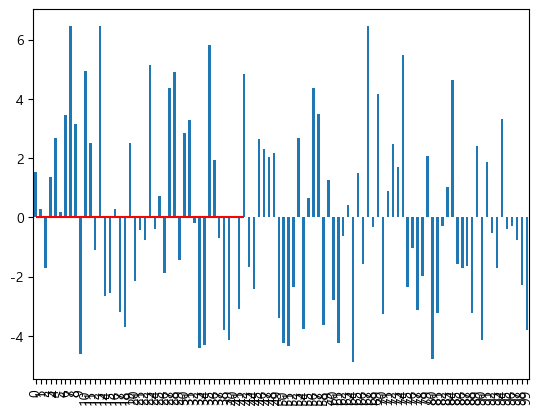

In [34]:
# 잔차 시각화
fitted_model.resid.plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=42, colors='red') #잔차는 0을 기준으로 생성되기 때문에 y=0의 선을 그어준다. (기준선 역할)
plt.show()

## 오차항의 등분산성

In [ ]:
# 오차항의 등분산성 (Homoscedasticity)
# **등분산성(homoscedasticity)**는 회귀 분석에서 중요한 가정 중 하나로, 오차 항의 분산이 일정하게 유지되는 것을 의미합니다. 즉, 독립 변수의 값이 변하더라도 오차 항의 분산이 일정해야 합니다. 이 가정이 충족되지 않으면, **이분산성(heteroscedasticity)**이 발생하게 됩니다.

# 등분산성 (Homoscedasticity):
# 오차 항의 분산이 독립 변수의 값과 무관하게 일정합니다.
# 이상적인 회귀 모델에서는 오차가 무작위로 분포하며 일정한 분산을 가집니다.


In [ ]:
# 등분산성 검정 방법
# 잔차 플롯 (Residual Plot):

# 잔차 플롯은 예측값과 잔차 간의 관계를 시각화하여 등분산성을 확인하는 데 사용됩니다.
# 잔차 플롯에서 오차 항이 무작위로 분포하고 일정한 폭을 가지면 등분산성을 만족한다고 볼 수 있습니다.
# 만약 잔차가 부채꼴 모양이나 원뿔 모양으로 나타난다면, 이분산성을 의심할 수 있습니다.

# Breusch-Pagan 검정:
# 잔차의 제곱을 독립 변수에 회귀 분석하여 이분산성을 검정하는 방법입니다.
# 귀무가설: 등분산성이 있다.
# 대립가설: 이분산성이 있다.

#White Test를 통한 이분산 검정

In [41]:
import seaborn as sns


### 잔차 플롯 (Residual Plot)

In [42]:
# yhat은 model 형성을 하면서 feature를 넣고 도출된 회귀값들임
yhat = fitted_model.fittedvalues
subset = pd.concat([yhat, target, fitted_model.resid], axis=1)
subset.columns = ['yhat', 'target', 'model_residual']

# 따라서 yhat, 전체형법범죄 데이터의 차이는 잔차 값으로 남아있음. (컬럼 자체를 연산하지 않았지만, 연산 결과는 잔차와 동일함)
# subset

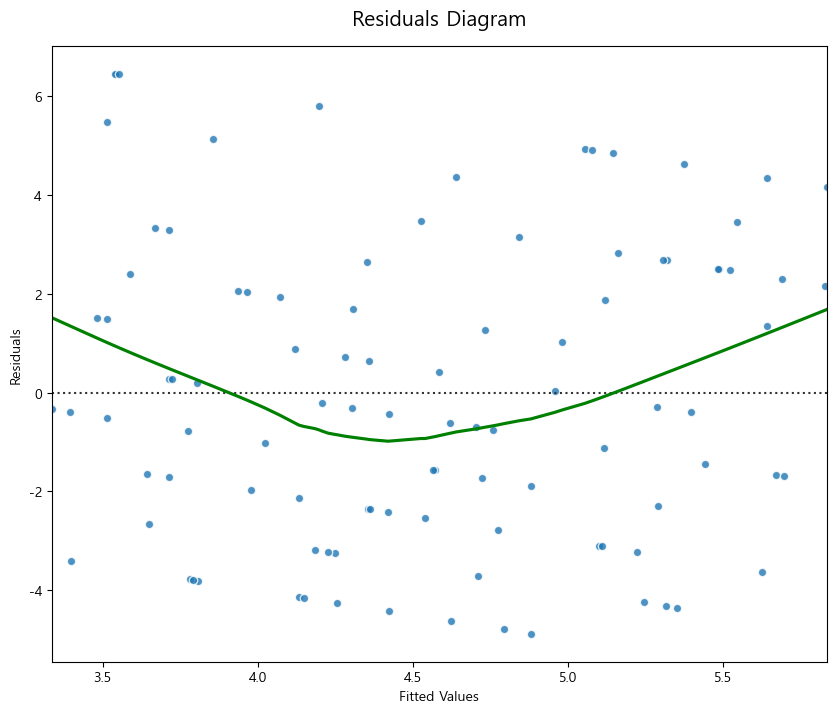

In [43]:
# 오차항의 등분산성을 확인하기 위한 플롯 형성
fig = plt.figure(figsize= (10,8))

# yhat값의 변화에 따라 오차항이 어떻게 변화하는지 육안으로 확인하는 부분 (등분산성은 yhat값과 무관하게 일정한 분산을 유지하는 형태로 도출됨)
sns.residplot(x = "yhat", y = "target",
              data = subset, scatter_kws = {'edgecolor':"white"},
              lowess = True, line_kws = {"color":"green"})
plt.title("Residuals Diagram", fontsize=15, y=1.02)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

### Breusch-Pagan 검정

In [ ]:
# Breusch-Pagan 검정을 통해 회귀 분석에서 오차 항의 등분산성 가정이 충족되는지 검정합니다. 
# statsmodels 라이브러리의 het_breuschpagan 함수를 사용하며, 검정 결과를 출력합니다.

In [44]:
# 하나씩 시행해보기
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = sm.het_breuschpagan(fitted_model.resid, fitted_model.model.exog)

# 독립변수, featue의 values (endog는 y값)
# fitted_model.model.exog

for i in lzip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')
# which assumes independent and identically distributed
# error terms, or the original Breusch-Pagan version which assumes
# residuals are normally distributed.

# The null hypothesis (H0): Homoscedasticity is present.

Lag_range multiplier statistic :  2.298
p-value :  0.317
f-value :  1.141
f p-value :  0.324


In [ ]:
# p-value:
# p-value < 0.05: 귀무가설(등분산성 있음)을 기각, 이분산성이 있다고 판단
# p-value ≥ 0.05: 귀무가설 채택, 등분산성이 있다고 판단

In [ ]:
# 결론
# p-value가 0.05보다 작으면 이분산성이 존재한다고 판단할 수 있습니다.
# 이분산성이 있는 경우, 회귀 모델의 결과 해석이 왜곡될 수 있으므로 로그 변환이나 가중회귀 분석 등의 방법을 고려해야 합니다.

### White Test를 통한 이분산 검정

In [ ]:
# White Test는 회귀 분석에서 오차 항의 **이분산성(heteroscedasticity)**을 검정하기 위해 사용되는 방법입니다. 
# 이 검정은 Breusch-Pagan 검정보다 더 일반적인 형태로, 독립 변수의 비선형 함수까지 고려합니다. 
# 따라서 이분산성이 비선형적인 경우에도 검출할 수 있습니다.

In [60]:
# 이분산 검정 추가 (white test)
from statsmodels.stats.api import het_white

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(fitted_model.resid, fitted_model.model.exog)

print(dict(zip(labels, white_test)))

# Null (H0): Homoscedasticity is present (residuals are equally scattered)
# Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

{'Test Statistic': 3.685668483507154, 'Test Statistic p-value': 0.5954981441967797, 'F-Statistic': 0.7194211536220774, 'F-Test p-value': 0.6104471318978928}


In [ ]:
# Test Statistic p-value: 0.5955

# p-value > 0.05이므로, 귀무가설(H0)을 기각할 수 없습니다.
# 이는 **오차 항이 등분산성을 가진다 (Homoscedasticity)**는 귀무가설을 기각할 충분한 증거가 없음을 의미합니다.
# 따라서, 이분산성(Heteroscedasticity)이 없고, 등분산성을 만족한다고 판단할 수 있습니다.
# F-Test p-value: 0.6104

# F-Test p-value도 0.05보다 크기 때문에, 이 결과 역시 귀무가설을 기각하지 못합니다.
# F-검정 결과 역시 등분산성을 만족한다고 판단할 수 있습니다.

## 오차항의 독립성(자기상관성 여부)

### 방법1

In [47]:
# 더빈왓슨 통계 (DW-test) : 0~4
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.

from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=fitted_model.resid)

1.9785872282150523

### 방법2

In [48]:
# 잔차 정의
resids=fitted_model.resid
# DW 통계치를 구하는 공식 적용 (시차 1 적용)
diff_resids = np.diff(resids, 1, axis=0)
dw = np.sum(diff_resids**2, axis=0) / np.sum(resids**2, axis=0)
# dw 통계치 도출 완료
dw

1.9785872282150523

### 방법3 DW 검정에 대한 설명
The test statistic is approximately equal to 2*(1-r) where ``r`` is the
sample autocorrelation of the residuals. Thus, for r == 0, indicating no
serial correlation, the test statistic equals 2. This statistic will
always be between 0 and 4. The closer to 0 the statistic, the more
evidence for positive serial correlation. The closer to 4, the more
evidence for negative serial correlation.

In [ ]:
# Durbin-Watson 검정 (DW 검정)
# Durbin-Watson 검정은 회귀 분석에서 **오차항의 자기상관성(autocorrelation)**을 검정하기 위한 통계적 방법입니다. 자기상관성이란, 오차항이 이전의 오차항과 상관관계를 가지는 현상을 말합니다. 이는 선형 회귀 모델의 가정 중 하나인 "오차 항이 독립적이다"라는 가정을 검증하는 데 사용됩니다.

# Durbin-Watson 통계량의 해석
# DW 통계량 범위: [0, 4]
# DW ≈ 2: 오차 항에 자기상관성이 없음.
# DW < 2: 양의 자기상관성이 있음 (오차가 이전 오차와 양의 상관관계를 가짐).
# DW > 2: 음의 자기상관성이 있음 (오차가 이전 오차와 음의 상관관계를 가짐).

In [ ]:
# *plot_acf()**는 ACF (Autocorrelation Function) 플롯을 생성합니다.
# Lag에 따른 오차항의 자기상관성을 시각적으로 보여줍니다.
# ACF 플롯 해석:
# Lag 값이 증가함에 따라 자기상관 값이 급격히 감소하면, 오차항 간의 상관성이 약하다는 의미입니다.
# Lag 값이 클수록 자기상관 값이 높은 경우, 오차항에 자기상관성이 존재할 가능성이 있습니다.

In [ ]:
# durbin_watson() 함수는 오차항 배열을 입력으로 받아 Durbin-Watson 통계량을 계산합니다.
# Durbin-Watson 통계량은 오차항 간의 자기상관성을 진단하는 지표입니다.

# 포맷팅 (:.5f):

# :.5f는 소수점 다섯 번째 자리까지 반올림하여 출력합니다.

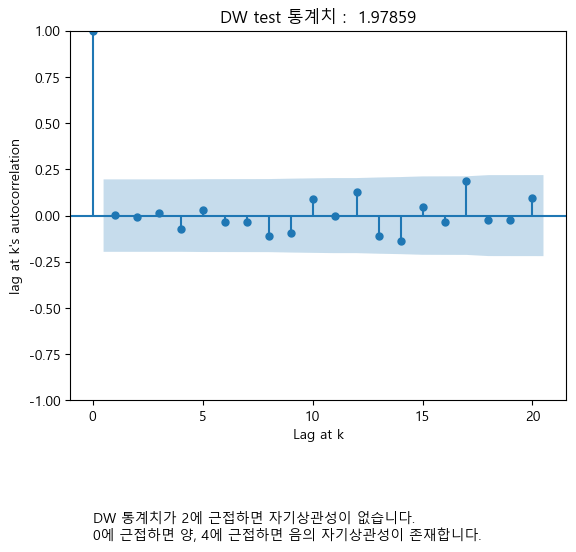

In [59]:
def autocorr_resid(fitted_model):
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt
    from statsmodels.stats.stattools import durbin_watson

    # 오차항의 자기상관성 검정
    plot_acf(fitted_model.resid)
    plt.xlabel('Lag at k')
    plt.ylabel("lag at k's autocorrelation")
    plt.title(f'DW test 통계치 : {durbin_watson(resids=fitted_model.resid) : .5f}')
    plt.text(y=-1.75,x=0, s='DW 통계치가 2에 근접하면 자기상관성이 없습니다.\n0에 근접하면 양, 4에 근접하면 음의 자기상관성이 존재합니다.')
    plt.show()

autocorr_resid(fitted_model)